## Tennis Data (2007-2020) - Women's

(tennis-data.co.uk)

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
directory = r"Tennis Data - Women's"

# store column entry count for each year
data = {}

for filename in os.listdir(directory):
    if filename.endswith((".xls", ".xlsx")):
        df = pd.read_excel(directory + '/' + filename)
        
        year = os.path.splitext(filename)[0]
        nrows, ncols = df.shape
        
        col_count = dict(df.count())
        colObj = {}
        for k, v in col_count.items():
            colObj[k] = round(v/nrows, 2)
        
        yearObj = {
            'nrows': nrows,
            'ncolumns': ncols,
            'col_density': colObj
        }
        
        data[year] = yearObj

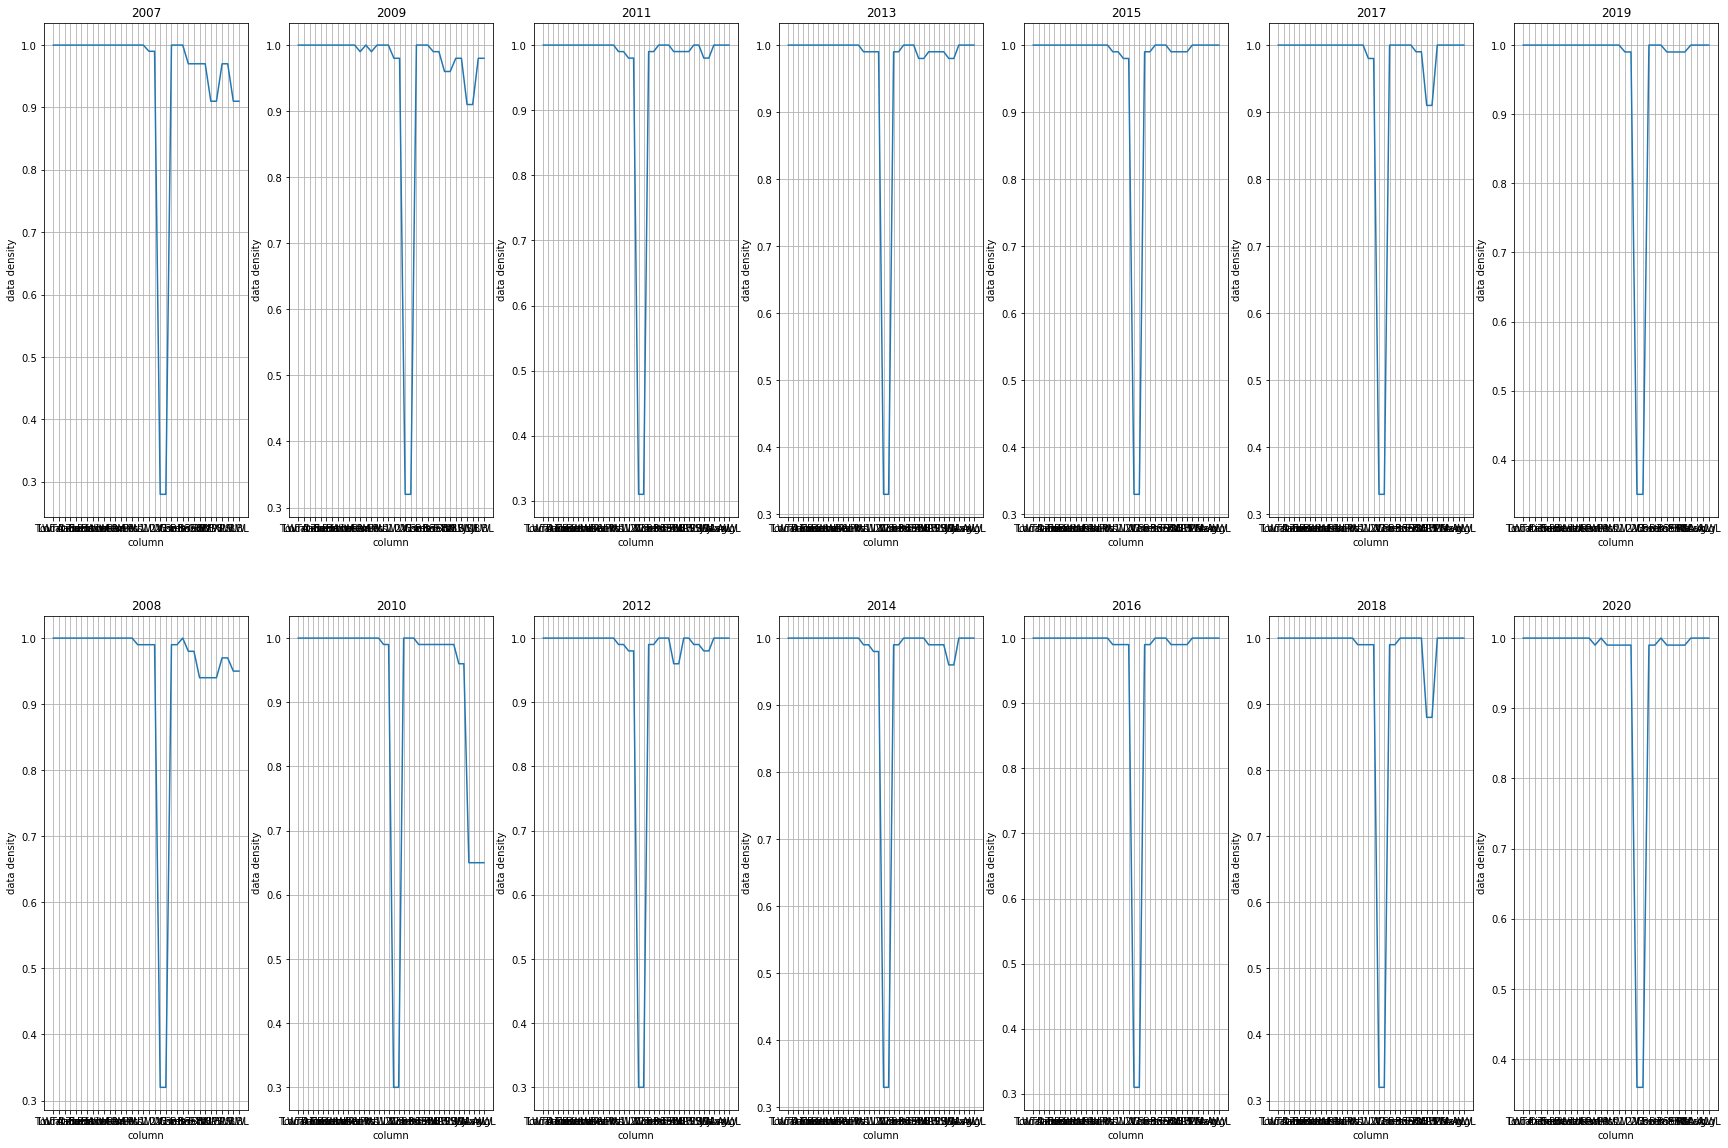

In [7]:
# plot data sparsity

years = len(data.keys())

fig, axs = plt.subplots(2, int(years/2), figsize=(30,20))

j = 0

for i in range(years):
    year = sorted(list(data.keys()))[i]
    columns = list(data[year]['col_density'].keys())
    values = list(data[year]['col_density'].values())
    
    axs[j][int(i/2)].plot(columns, values)
    axs[j][int(i/2)].set(xlabel='column', 
                    ylabel='data density',
                    title=f'{year}')
    axs[j][int(i/2)].grid()
    
    j = 1 - j

plt.show()

In [3]:
# plot individual year

def plotYear(data, year):
    
    columns = list(data['col_density'].keys())
    values = list(data['col_density'].values())
    
    fig, ax = plt.subplots(figsize=(5,10))
    
    ax.plot(values, columns, '--')
    for i, val in enumerate(values):
        ax.annotate(int(val*data['nrows']), (values[i], columns[i]))
    ax.set(xlabel='data density', 
           ylabel='column',
           title=f'{year}')
    ax.grid()
    
    plt.show()

In [8]:
year = '2010'

print(f'Data points: {data[year]["nrows"]}')

Data points: 2448


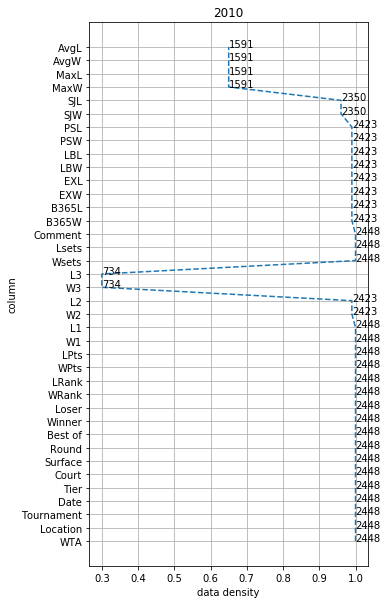

In [9]:
plotYear(data[year], year)

Notes for Tennis Data

ATP = Tournament number (men)  
WTA = Tournament number (women)  
Location = Venue of tournament  
Tournament = Name of tounament (including sponsor if relevant)  
Data = Date of match (note: prior to 2003 the date shown for all matches played in a single tournament is the start date)  
Series = Name of ATP tennis series (Grand Slam, Masters, International or International Gold)  
Tier = Tier (tournament ranking) of WTA tennis series.  
Court = Type of court (outdoors or indoors)  
Surface = Type of surface (clay, hard, carpet or grass)  
Round = Round of match  
Best of = Maximum number of sets playable in match  
Winner = Match winner  
Loser = Match loser  
WRank = ATP Entry ranking of the match winner as of the start of the tournament  
LRank = ATP Entry ranking of the match loser as of the start of the tournament  
WPts = ATP Entry points of the match winner as of the start of the tournament  
LPts = ATP Entry points of the match loser as of the start of the tournament  
W1 = Number of games won in 1st set by match winner  
L1 = Number of games won in 1st set by match loser  
W2 = Number of games won in 2nd set by match winner  
L2 = Number of games won in 2nd set by match loser  
W3 = Number of games won in 3rd set by match winner  
L3 = Number of games won in 3rd set by match loser  
W4 = Number of games won in 4th set by match winner  
L4 = Number of games won in 4th set by match loser  
W5 = Number of games won in 5th set by match winner  
L5 = Number of games won in 5th set by match loser  
Wsets = Number of sets won by match winner  
Lsets = Number of sets won by match loser  
Comment = Comment on the match (Completed, won through retirement of loser, or via Walkover)